In [56]:
library(readxl) 
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(rvest)

# Exploratory Data Analysis


In [57]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, destfile = "data/Data_User_Modeling_Dataset_Hamdi.xls")

In [58]:
training_data <- read_excel("data/Data_User_Modeling_Dataset_Hamdi.xls", sheet = 2) %>%
select(STG:UNS) %>%
mutate(UNS = as.factor(UNS))
training_data

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


In [59]:
testing_data <- read_excel("data/Data_User_Modeling_Dataset_Hamdi.xls", sheet = 3) %>%
select(STG:UNS) %>%
mutate(UNS = as.factor(UNS))

testing_data

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low
0.16,0.16,0.80,0.50,0.50,Middle
0.12,0.12,0.75,0.68,0.15,Low
0.20,0.20,0.88,0.77,0.80,High


The two tables above are our training and testing data that the owner of the data had already split for us

In [60]:
UNS_counts <- group_by(training_data, UNS) %>%
summarize(n = n()) %>%
arrange(desc(n))
UNS_counts

`summarise()` ungrouping output (override with `.groups` argument)



UNS,n
<fct>,<int>
Middle,88
Low,83
High,63
very_low,24


We've grouped and identified how many of each of the categories are in the training data which we then ordered in decending order. This shows that the two extreme knowledge levels (very low and High) have the least observations and the middle and low knowledge levels have more. 

In [61]:
UNS_mean <- select(training_data, STG:PEG) %>%
map_df(mean, na.rm = TRUE)

UNS_mean

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


We've found the mean value for each of our potential predictors. 

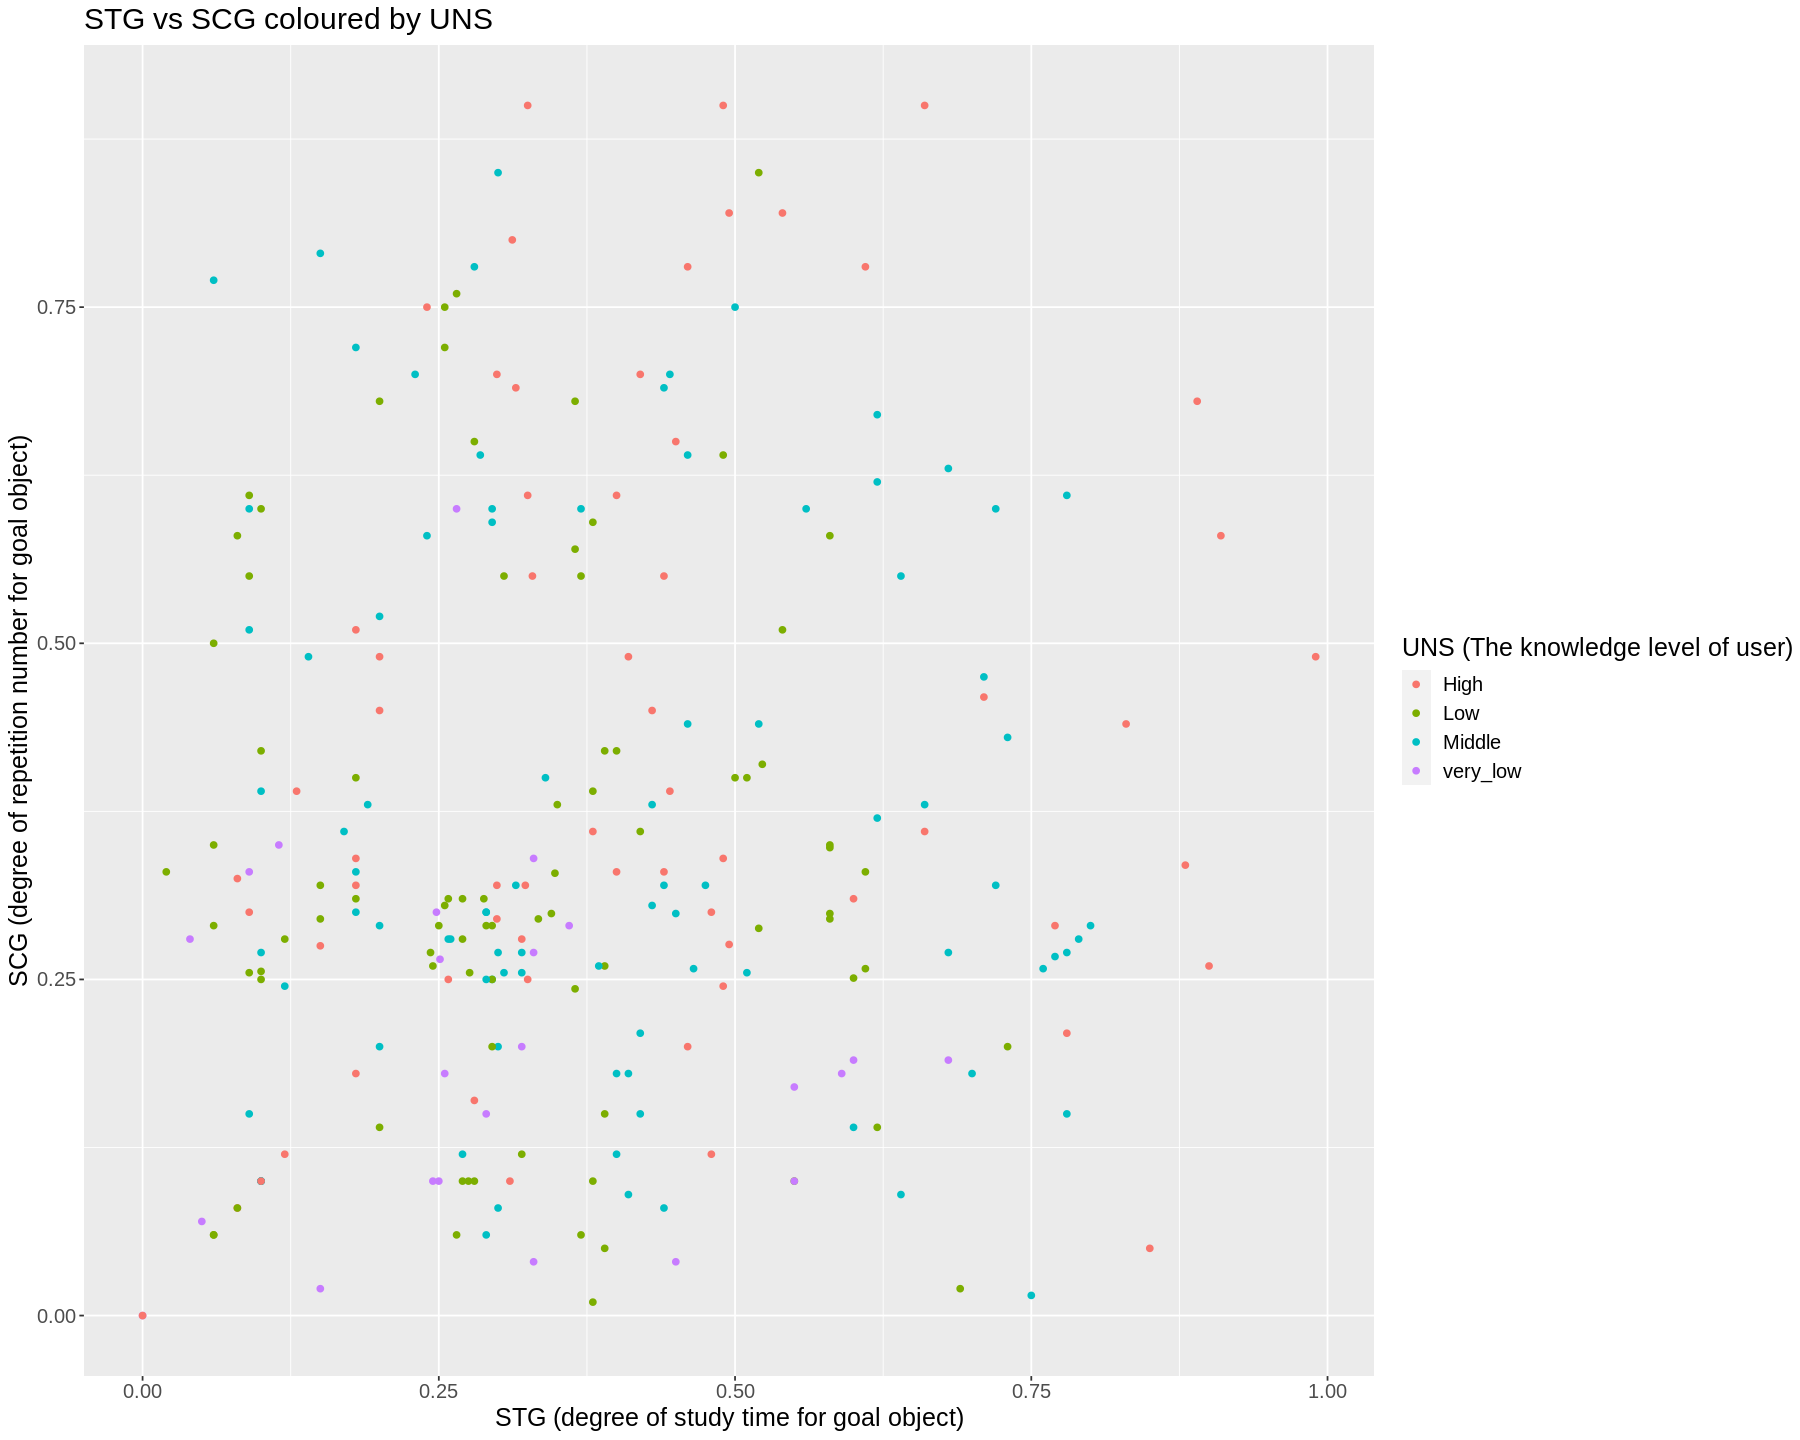

In [62]:
options(repr.plot.width = 15, repr.plot.height = 12)
predictor_plot_1 <- ggplot(training_data, aes(x = STG, y = SCG, color = UNS)) +
geom_point() +
labs(x = "STG (degree of study time for goal object)", y = "SCG (degree of repetition number for goal object)", color = "UNS (The knowledge level of user)") +
ggtitle("STG vs SCG coloured by UNS") +
theme(text = element_text(size = 15))
predictor_plot_1

We have ploted several plots to find potential predictors for the Use Knowledge leve (UNS). predictor_plot_1 shows very little patterns between SCG and STG in relation to UNS which suggests they are poor predictors and therefore should not be used. 

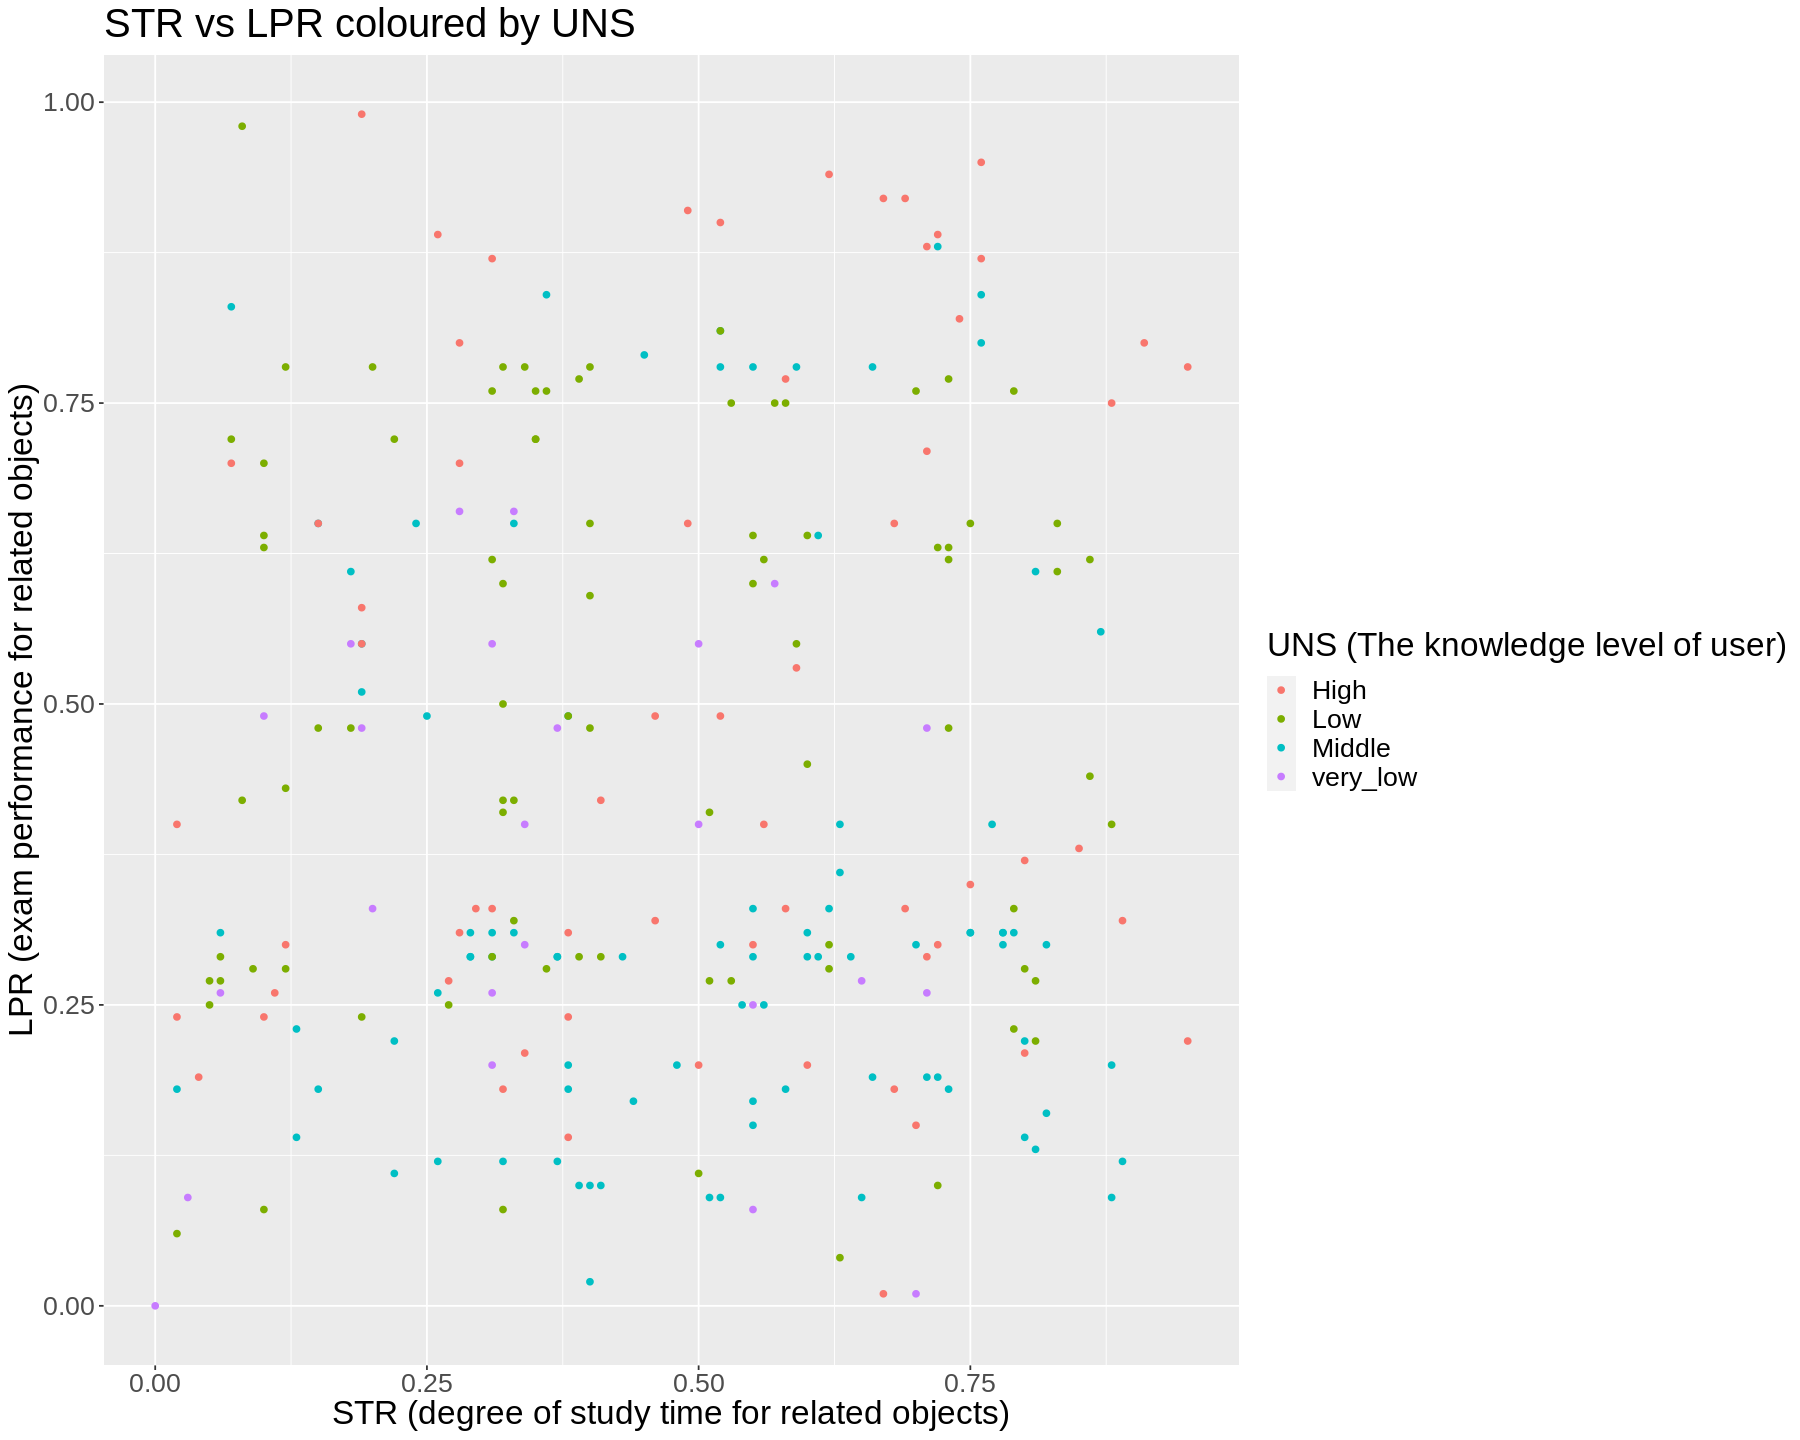

In [63]:
options(repr.plot.width = 15, repr.plot.height = 12)
predictor_plot_2 <- ggplot(training_data, aes(x = STR, y = LPR, color = UNS)) +
geom_point() +
labs(x = "STR (degree of study time for related objects)", y = "LPR (exam performance for related objects)", color = "UNS (The knowledge level of user)") +
ggtitle("STR vs LPR coloured by UNS") +
theme(text = element_text(size = 20))
predictor_plot_2

LPR and STR also seem to lack any strong correlation to UNS according to the scatter plot above.

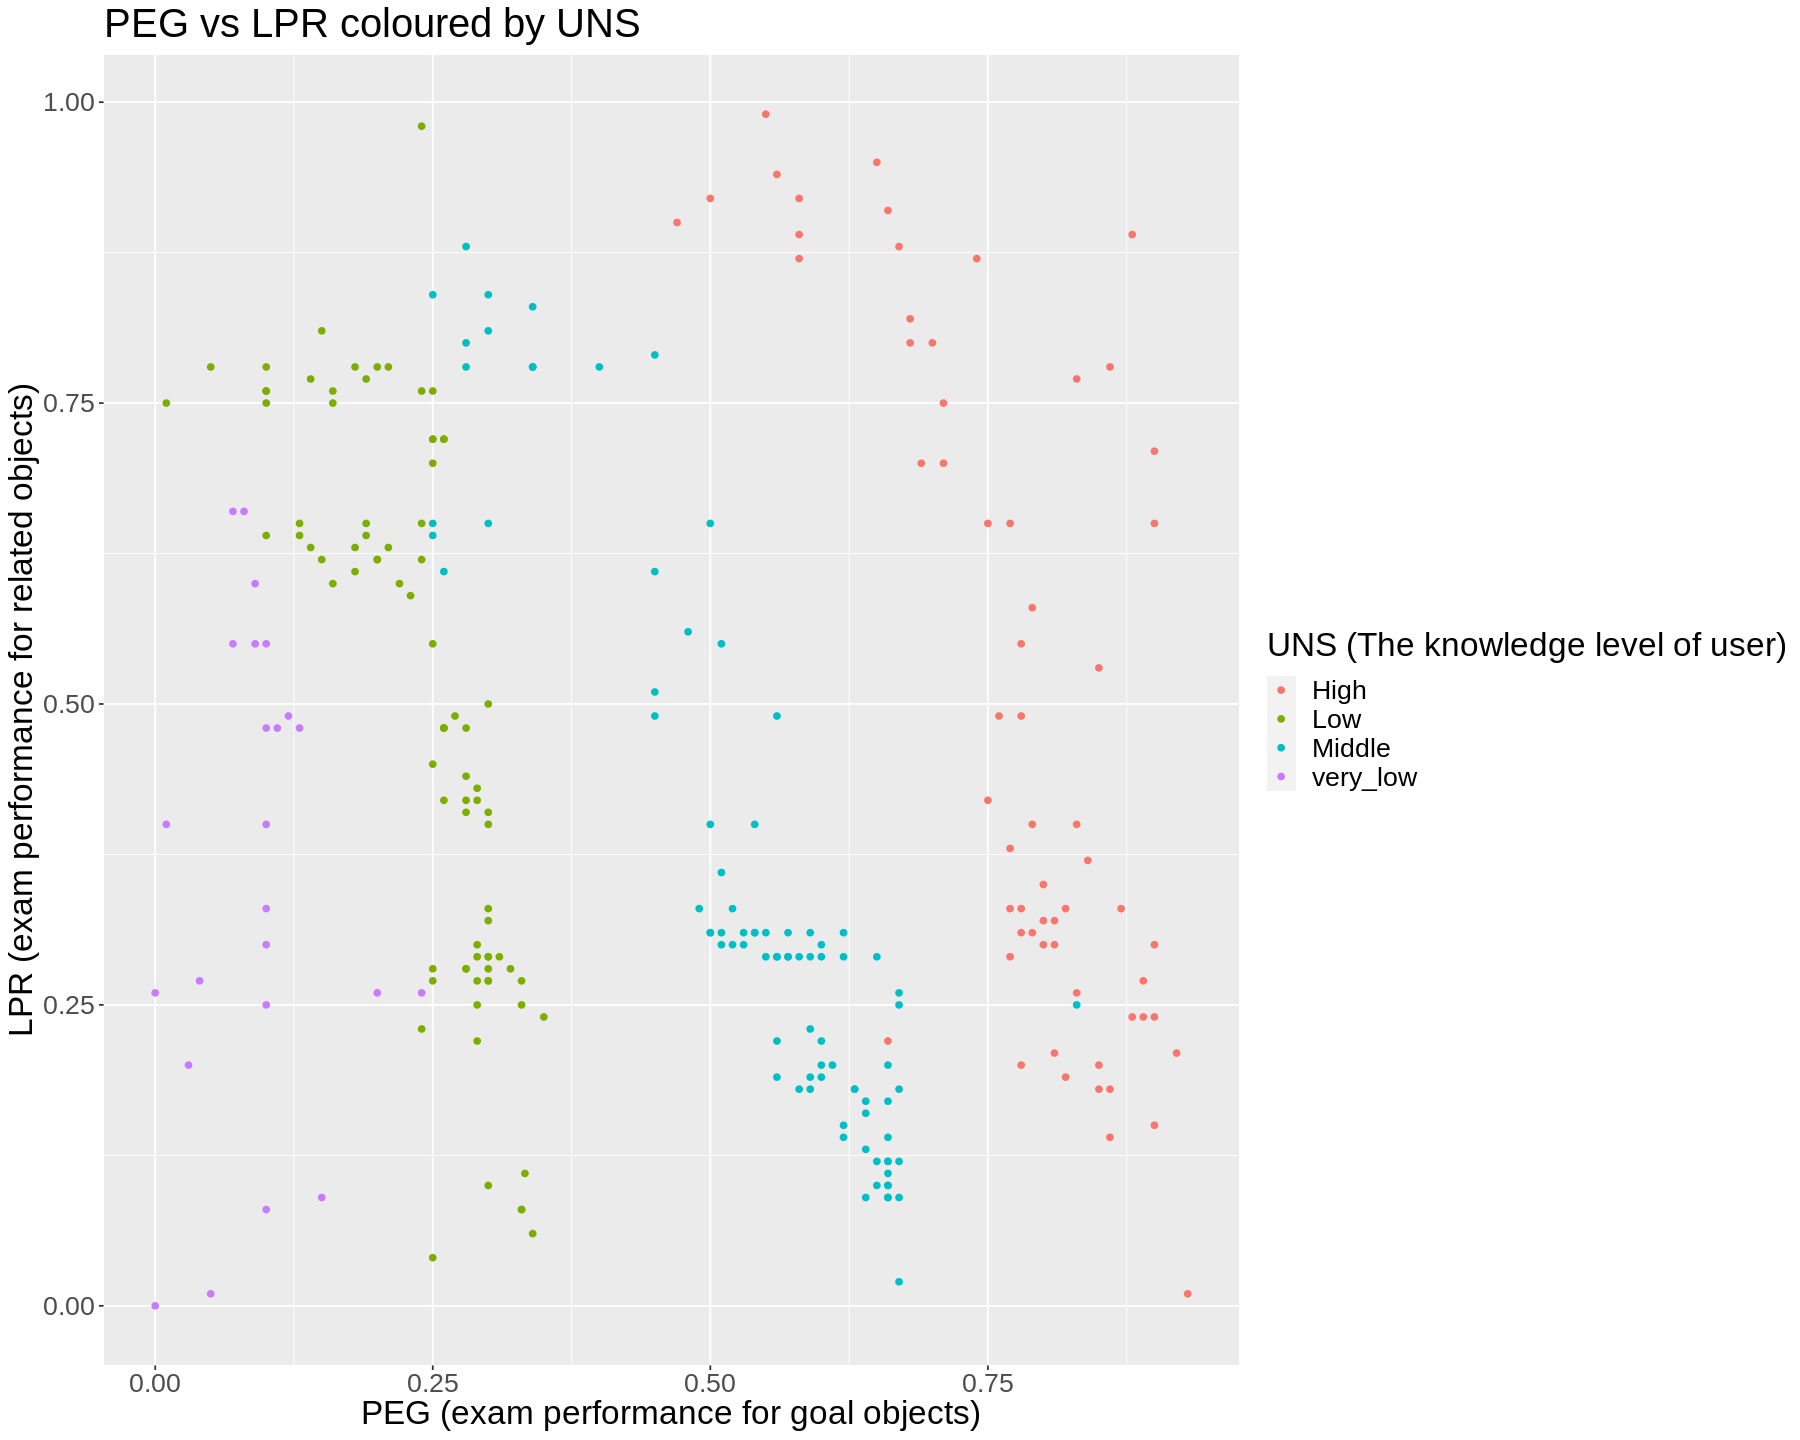

In [64]:
options(repr.plot.width = 15, repr.plot.height = 12)
predictor_plot_3 <- ggplot(training_data, aes(x = PEG, y = LPR, color = UNS)) +
geom_point() +
labs(x = "PEG (exam performance for goal objects)", y = "LPR (exam performance for related objects)", color = "UNS (The knowledge level of user)") +
ggtitle("PEG vs LPR coloured by UNS") +
theme(text = element_text(size = 20))
predictor_plot_3

Eventually, we found that PEG and LPR (especially PEG) are very clear predictors because when the scatterplot above shows that the Use knowledge has a strong direct relationship with PEG and a weaker, but still direct relationship with LPR. 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.9497624,5,0.011467320,Model1
4,accuracy,multiclass,0.9499132,5,0.012842980,Model2
6,accuracy,multiclass,0.9420701,5,0.012057296,Model3
7,accuracy,multiclass,0.9538348,5,0.012774584,Model4
9,accuracy,multiclass,0.9499132,5,0.011247017,Model5
10,accuracy,multiclass,0.9499132,5,0.011247017,Model6
11,accuracy,multiclass,0.9420701,5,0.008275559,Model7
13,accuracy,multiclass,0.9303054,5,0.007639543,Model8
14,accuracy,multiclass,0.9303054,5,0.007639543,Model9


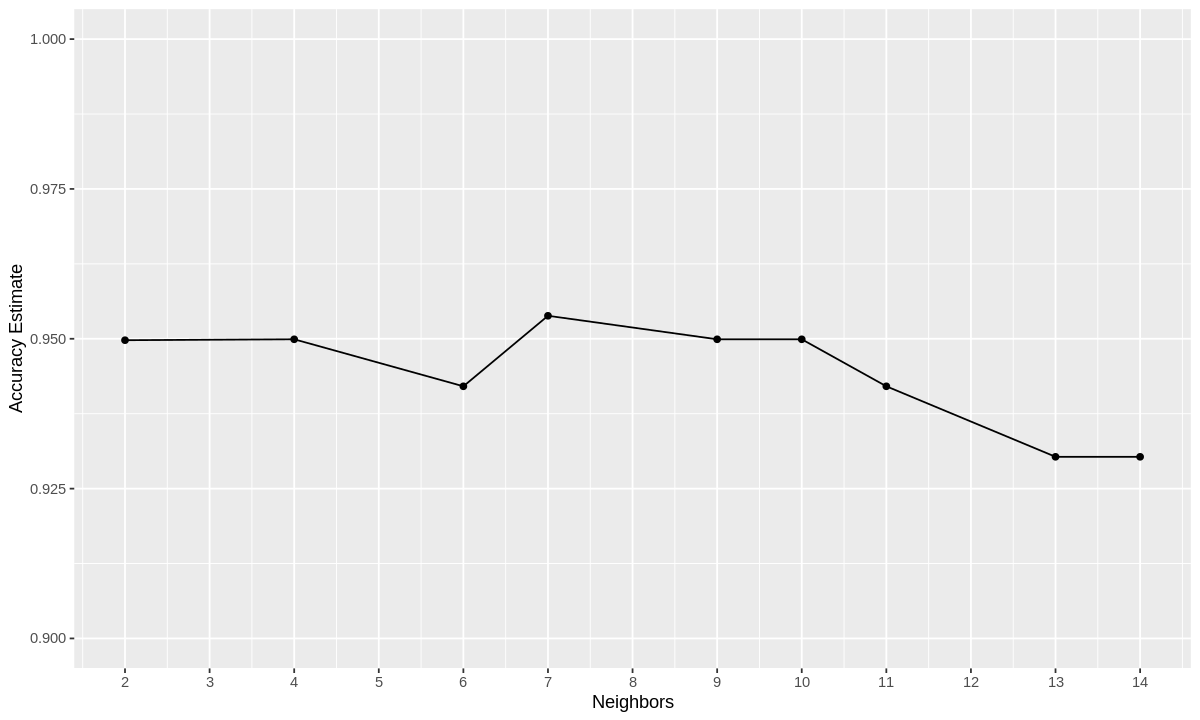

In [65]:
UNS_vfold <- vfold_cv(training_data, v = 5, strata = UNS)
UNS_recipe <- recipe(UNS ~ PEG + LPR, data = training_data)
UNS_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")
workflow <- workflow() %>%
add_recipe(UNS_recipe) %>%
add_model(UNS_spec) %>%
tune_grid(resamples = UNS_vfold, grid = 10) %>%
collect_metrics()

workflow_UNS <- filter(workflow, .metric == "accuracy")
workflow_UNS

options(repr.plot.width=10, repr.plot.height=6)
accuracy_versus_k <- ggplot(workflow_UNS, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.9, 1)) # adjusting the y-axis
accuracy_versus_k

To confirm that our choices for the predictors are good, we used cross validation on our training data to estimate the accuracy for some K values using LPR and PEG as our predictors. As the data above shows, more the nieghbors indicated, the mean accuracy ranges in the low to mid 90%. 

# Method

Since the UNS is a category variable, we know this is a classification problem. So, we will use a K-NN model with cross-validation for our predictions.
As above we get that LPR and PEG are enough to be used as predictors, and the graph shows that when k = 7, the accuracy estimate is the biggest. Therefore, in the next step, we will train the training data and use k = 7 to predict testing data. We will use incorrect results and correct results to form a bar plot to visualize the correctness of the prediction.